In [ ]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
from torchvision import  datasets, transforms

In [ ]:
x = torch.tensor(3., requires_grad=True)
y = torch.tensor(3., requires_grad=True)

In [ ]:
def f(x,y):
   return x**2 + y**2

In [ ]:
lr = 1e-1

In [ ]:
for _ in range(100):
  res = f(x,y)
  res.backward()
  with torch.no_grad():
    x -= lr*x.grad
    y -= lr*y.grad
  x.grad.zero_(), y.grad.zero_()





In [ ]:
print(f'x= {x} \ny={y} \nres = {res}')

x= 6.111108286077638e-10 
y=6.111108286077638e-10 
res = 1.1670513418678969e-18


transforms.ToTensor()  -> transform les données en tensor
transforms.Normalize -> Normalize les donnés


In [ ]:
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.1307, 0.3087)])

In [ ]:
train_loader=  torch.utils.data.DataLoader(datasets.MNIST("/projet",train=True ,transform=transforms, download=True), batch_size=32, shuffle = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 114723581.59it/s]


Extracting /projet/MNIST/raw/train-images-idx3-ubyte.gz to /projet/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 31844293.85it/s]


Extracting /projet/MNIST/raw/train-labels-idx1-ubyte.gz to /projet/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32480868.10it/s]


Extracting /projet/MNIST/raw/t10k-images-idx3-ubyte.gz to /projet/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13030457.43it/s]


Extracting /projet/MNIST/raw/t10k-labels-idx1-ubyte.gz to /projet/MNIST/raw



In [ ]:
test_loader=  torch.utils.data.DataLoader(datasets.MNIST("/projet", train=False ,transform=transforms, download=True), batch_size=32, shuffle = True)

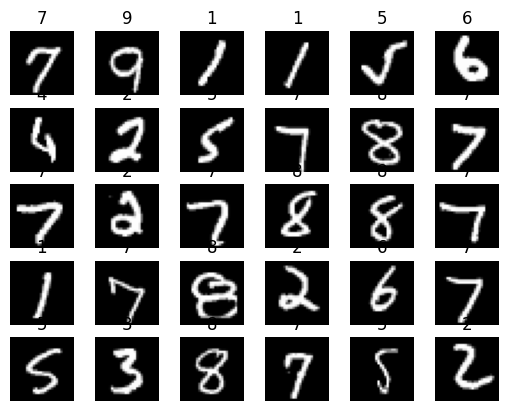

In [ ]:
for data_batch , label_data in train_loader:
    fig = plt.figure
    for i in range(1,31):
      data = data_batch[i,0]
      label = label_data[i]
      plt.subplot(5,6,i)
      plt.axis('off')
      plt.title(f'{label}')
      plt.imshow(data, cmap="gray")
    break
plt.show()

torch.Size([32, 1, 28, 28]) torch.Size([32])
32 -> batch size
1 -> channels =1 -> image en gris
28-> largeur
28 - > hauteur

In [ ]:

class Dense(nn.Module):

    def __init__(self):
        super(Dense, self).__init__()
        self.layer1 = nn.Linear(28*28, 64)
        self.layer2 = nn.Linear(64, 10)
        self.init_weights()

    def init_weights(self):
        for p in self.parameters():
            if p.dim() == 1:
                nn.init.normal_(p)
            else:
                nn.init.kaiming_normal_(p)

    def forward(self, x):
        x = x.view((-1, 28*28))
        x = F.relu(self.layer1(x))
        x = F.softmax(self.layer2(x), dim=1)
        return x


n_epochs = 1
model = Dense()
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [ ]:
def accuracy(proba_batch,label_batch):
  correct = 0
  batch_size = label_batch.size(0)
  preds = torch.argmax(proba_batch, dim=1)
  for i, pred in enumerate(preds):
    if pred == label_batch[i]:
      correct += 1
  return correct / batch_size

In [ ]:
for epoch in range(n_epochs):
    print(f'Epoch {epoch + 1}/{n_epochs}')

    for batch_index, (data_batch, label_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        pred_batch = model(data_batch)
        loss = criterion(pred_batch, label_batch)
        loss.backward()
        optimizer.step()
        acc = accuracy(pred_batch, label_batch)
        print(f'\rBatch {batch_index + 1}/{len(train_loader)}, Loss = {loss:.3f}, Accuracy = {acc:.3f}', end='')
    print()

    total_loss, total_acc, batch_count = 0., 0., 0
    for data_batch, label_batch in test_loader:
        batch_count += 1
        with torch.no_grad():
            pred_batch = model(data_batch)
            loss = criterion(pred_batch, label_batch)
            acc = accuracy(pred_batch, label_batch)
            total_loss += loss.item()
            total_acc += acc

    avg_loss = total_loss / batch_count
    avg_acc = total_acc / batch_count
    print(f'Validation Loss = {avg_loss:.3f}, Validation Accuracy = {avg_acc:.3f}')


Epoch 1/1
Batch 1875/1875, Loss = 1.751, Accuracy = 0.688
Validation Loss = 1.613, Validation Accuracy = 0.850


In [ ]:

class CNN(nn.Module):

    def __init__(self):
        super(Dense, self).__init__()
        self.conv1 = nn.Conv2d(1,10, kernel_size=5)
        self.conv2 = nn.Conv2d(10,20,kernel_size=5)
        self.dense1 = nn.Linear(320, 50)
        self.dense2 = nn.Linear(50,10)
        self.init_weights()

    def init_weights(self):
        for p in self.parameters():
            if p.dim() == 1:
                nn.init.normal_(p)
            else:
                nn.init.kaiming_normal_(p)

    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x,2)
        x = F.relu(x)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.dropout2d(x, 0.5))
        x = x.view((-1,320,))
        x = F.relu(F.dropout(self.dense1(x) training=se))
        x = F.softmax(self.dense2(x), dim = -1)
        return x


n_epochs = 1
model = Dense()
learning_rate = 1e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(n_epochs):
    print(f'Epoch {epoch + 1}/{n_epochs}')
    for batch_index, (data_batch, label_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        pred_batch = model(data_batch)
        loss = criterion(pred_batch, label_batch)
        loss.backward()
        optimizer.step()
        acc = accuracy(pred_batch, label_batch)
        print(f'\rBatch {batch_index + 1}/{len(train_loader)}, Loss = {loss:.3f}, Accuracy = {acc:.3f}', end='')
    print()

    total_loss, total_acc, batch_count = 0., 0., 0
    for data_batch, label_batch in test_loader:
        batch_count += 1
        with torch.no_grad():
            pred_batch = model(data_batch)
            loss = criterion(pred_batch, label_batch)
            acc = accuracy(pred_batch, label_batch)
            total_loss += loss.item()
            total_acc += acc

    avg_loss = total_loss / batch_count
    avg_acc = total_acc / batch_count
    print(f'Validation Loss = {avg_loss:.3f}, Validation Accuracy = {avg_acc:.3f}')


Epoch 1/1
Batch 1875/1875, Loss = 1.483, Accuracy = 0.969
Validation Loss = 1.522, Validation Accuracy = 0.942
